<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-parameters" data-toc-modified-id="Model-parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model parameters</a></span></li><li><span><a href="#number-of-data-points" data-toc-modified-id="number-of-data-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>number of data points</a></span></li><li><span><a href="#simulate-the-data" data-toc-modified-id="simulate-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>simulate the data</a></span></li><li><span><a href="#find-$2_{nd}$-and-$3_{rd}$-sample-autocorrelation" data-toc-modified-id="find-$2_{nd}$-and-$3_{rd}$-sample-autocorrelation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>find $2_{nd}$ and $3_{rd}$ sample autocorrelation</a></span></li><li><span><a href="#Create-2*2-matrix-R" data-toc-modified-id="Create-2*2-matrix-R-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create 2*2 matrix R</a></span></li><li><span><a href="#Put-sample-autocorrelation-to-a-vector" data-toc-modified-id="Put-sample-autocorrelation-to-a-vector-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Put sample autocorrelation to a vector</a></span></li><li><span><a href="#Find-x-to-satisfy-$Rx=b$,-$x-=-R^{-1}b$" data-toc-modified-id="Find-x-to-satisfy-$Rx=b$,-$x-=-R^{-1}b$-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Find x to satisfy $Rx=b$, $x = R^{-1}b$</a></span></li><li><span><a href="#Find-the-variance-of-$z_t$" data-toc-modified-id="Find-the-variance-of-$z_t$-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find the variance of $z_t$</a></span></li></ul></div>

* $x_t = \phi_1*x_(t-2) +\phi_2*x_(t-2) +z_t$
* $z_t$~$N(0,\sigma^2)$

In [1]:
set.seed(2017)

### Model parameters

In [2]:
sigma = 4
phi = NULL
phi[1:2] = c(1/3,1/2)
phi

[1] 0.3333333 0.5000000

### number of data points

In [3]:
n = 10000

### simulate the data

In [4]:
ar.process = arima.sim(n,model = list(ar = c(1/3,1/2)),sd =4)
ar.process[1:5]

[1] 4.087685 5.598492 3.019295 2.442354 5.398302

### find $2_{nd}$ and $3_{rd}$ sample autocorrelation

In [5]:
r=NULL
r[1:2]=acf(ar.process,plot = F)$acf[2:3]
r

[1] 0.6814103 0.7255825

### Create 2*2 matrix R

In [6]:
R = matrix(1,2,2)
R[1,2] = r[1]
R[2,1] = r[1]
R

1.0000000,0.6814103
0.6814103,1.0000000


### Put sample autocorrelation to a vector

In [7]:
b = matrix(r,nrow = 2,ncol = 1)
b

0.6814103
0.7255825


### Find x to satisfy $Rx=b$, $x = R^{-1}b$

In [8]:
phi.hat = matrix(c(solve(R,b)[1,1],solve(R,b)[2,1]),2,1)
phi.hat

0.3490720
0.4877212


### Find the variance of $z_t$

In [9]:
c0 = acf(ar.process,type = "covariance",plot = F)$acf[1]
var.hat = c0*(1-sum(phi.hat*r))
var.hat

[1] 16.37169

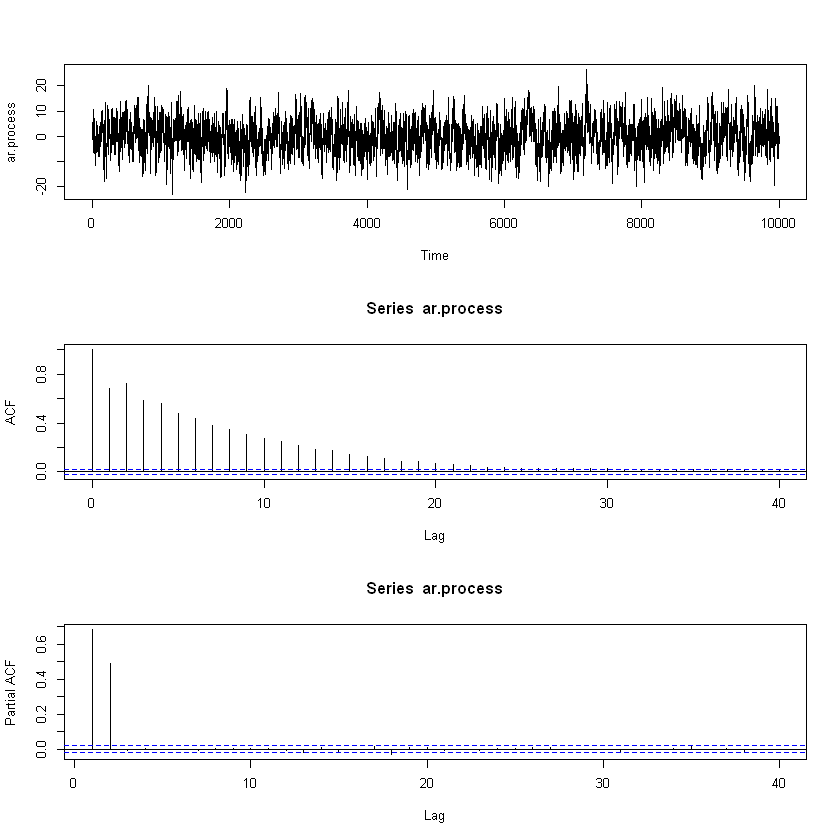

In [10]:
par(mfrow = c(3,1))
plot(ar.process)
acf(ar.process)
pacf(ar.process)